# 3.4 Modelo de Clasificación Análisis del Discriminate

### Miguel Ángel Jiménez Cuadrillero
### 2020

Se utiliza para predecir la probabilidad de pertenecer a una clase dada o categoría, basándose en una o múltiples variables predictoras.
Los valores posibles de la salida predictora son:
* 0/1
* no/yes
* negative/positive

Existen distintos métodos de Análisis del Discriminante:

* LDA: usa una combinación lineal de predictores que asume que están normalmente distribuidos e idénticas varianzas para las variables.

* QDA: usa relaciones cuadráticas y no tiene las restricciones del anterior.

* MDA: asume que cada clase es una mezcla gaussiana de subclases.

* …

*OBJETIVO*: Predecir la especie de flor en función de sus características. Es un problema de clasificación, no de regresión, por lo tanto se evalúa de una forma distinta.

## Carga de Datos

In [5]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
from sklearn.model_selection import train_test_split
plt.figure(figsize=(20,5))

random_state = 123

from sklearn import datasets

<Figure size 1440x360 with 0 Axes>

## Análisis Exploratorio de Datos

In [6]:
df = pd.read_csv("./datasets/iris.csv", sep=',')

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Estudio numérico de datos

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualización de Datos

Representamos scatterplots de las variables dos a dos. En la diagonal tenemos el histograma de la variable en cuestión.

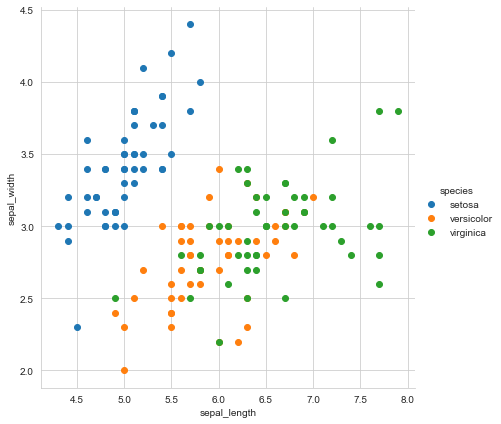

In [11]:
sns.set_style("whitegrid") 
  
sns.FacetGrid(df, hue ="species", height = 6).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend() 

## Interpretación preliminar


En el gráfico anterior vemos que hay una relacion entre las especies y sus tamaños aunque hay zonas donde la región de decisión no está muy clara.

## Entrenamiento del Modelo



## Selección de Features y Label

La fórmula de la función f(X) = y que queremos ajustar mediante un modelo de LDA sobre los datos es Species ~ . en formato R, es decir, utilizar todas las variables disponibles para predecir la especiel, en scikit-learn sólo tendremos que separar el target o label a predecir.


## División Train/Test


In [12]:
df = pd.read_csv("./datasets/iris.csv", sep=',')

y = df.pop('species').values
X = df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=random_state)

## Data Cleaning y Feature Engineering
### Normalización de datos

Consultar: https://en.wikipedia.org/wiki/Feature_scaling

Normalizamos los datos numéricos para que estén en la misma escala. Los datos categóricos se excluyen automáticamente.

La estandarización hace que los valores de cada característica en los datos tengan media cero (al restar la media en el numerador) y varianza unitaria. Este método se usa ampliamente para la normalización en muchos algoritmos de aprendizaje automático (por ejemplo, máquinas de vectores de soporte , regresión logística y redes neuronales artificiales).

* “center“: subtract mean from values. 

* “scale“: divide values by standard deviation.

En scikit-learn el "center & scale" se llama StandarScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train) #Equivalente a: X_train = sc.fit(X_train).transform(X_train)

X_test = sc.transform(X_test)

print(sc.mean_)

[5.85       2.99       4.17       1.41666667]


## Modelo Linear Discriminant Analysis LDA

Este algoritmo empieza buscando direcciones en los datos que maximicen la separación entre clase, entonces usará esas direcciones para predecir las clase de los distintos datapoints. Estas direcciones se llaman discriminantes lineales y son combinaciones lineales de las variables predictoras.

LDA asume que las variables predictoras están normalmente distribuidas o de forma gaussiana, que cada una tiene una media específica por clases y todas tienen igual varianza.

Es importante conocer estas suposiciones porque previamente al cálculo del modelo tendremos que comprobar dichas limitaciones en los datos y hacer las manipulaciones y limpiezas necesarias para cumplir con dichos requisitos.

Algunas de las manipulaciones que podrían ser necesarias son:

Explorar las distribuciones y las variables que no tengan una distribución normal realizar una transformación tipo logaritmo, raiz cuadrada, exponencial o un Box-cox para distribuciones sesgadas.

Eliminar outliers y después estandarizar las variables (los outliers añaden varianza innecesaria)

## Configuración del Modelo

Los predictores de entrada en este caso no se establecen como una formula si no que asume que son todas las columnas que se le pase al método fit.

Se realiza un encoding de la label

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
print(y)
y = le.fit_transform(y)
print(y)
y_test = le.transform(y_test)
y_train = le.transform(y_train)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

In [16]:
lda.classes_

array([0, 1, 2])

### Cantidad de varianza explicada por cada Discriminante Lineal

In [17]:
lda.explained_variance_ratio_

array([0.96572797, 0.03427203])

### Coefficients of linear discriminants: muestra la combinación lineal de variables predictoras usadas para la decisión

LD1 = 0.83 * Sepal.Length + 0.94 * Sepal.Width -3.88 * Petal.Length - 1.32 * Petal.Width

In [18]:
lda.scalings_

array([[ 0.83836906,  0.80826969],
       [ 0.94824752,  0.56896878],
       [-3.88964032, -3.1756768 ],
       [-1.32435218,  2.94835738]])

In [19]:
lda.coef_

array([[  8.11093825,   9.02287119, -37.37958988, -10.96336916],
       [ -1.70018206,  -1.51953542,   7.21684477,  -2.25221674],
       [ -2.30489437,  -2.87864135,  11.14555745,   6.96573839]])

In [20]:
X_lda

array([[-3.77205295,  1.87429143],
       [-3.17296748, -0.43433875],
       [-3.27789916, -0.43494826],
       [-2.89772499,  0.96462805],
       [ 9.09556318,  0.36081684],
       [-1.48556952, -0.83425628],
       [ 8.66357526,  0.04297887],
       [ 0.18546632, -2.01078096],
       [-1.25191828, -1.59463891],
       [ 8.99525678,  0.31343197],
       [-2.46712181, -1.08625582],
       [-4.16972278,  2.11983087],
       [-1.02982575, -0.30808566],
       [-4.12839822,  2.60317411],
       [-3.80064423, -0.18764995],
       [11.0615978 ,  1.06913091],
       [-1.11501768, -1.96732748],
       [ 8.29412494, -0.27573854],
       [-3.34381442,  2.00117063],
       [-4.50760796, -0.22844854],
       [-0.25224842, -0.83005497],
       [ 0.45923552, -1.7862238 ],
       [-2.7196049 ,  0.12509068],
       [-3.61926706, -1.29818027],
       [-3.21084135, -1.4327951 ],
       [ 9.40603166,  1.11549262],
       [ 1.50860463, -0.3941132 ],
       [-1.2541944 , -0.61118806],
       [-2.34314811,

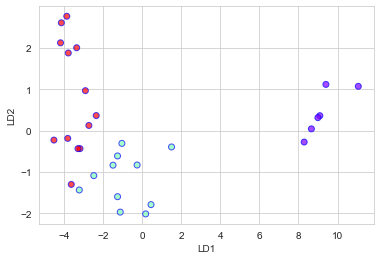

In [21]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = lda.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nAccuracy ' + str(accuracy_score(y_test, y_pred)))

[[44  0  0]
 [ 0 38  1]
 [ 0  2 35]]

Accuracy 0.975


## LDA como técnica de reducción de dimensionalidad

Podemos usar LDA para calcular una proyección de un conjunto de datos y seleccionar una cantidad de dimensiones o componentes de la proyección para usar como entrada a un modelo.

La biblioteca scikit-learn proporciona la clase LinearDiscriminantAnalysis que puede ajustarse a un conjunto de datos y usarse para transformar un conjunto de datos de entrenamiento y cualquier conjunto de datos adicional en el futuro.

También puede ser una buena idea estandarizar los datos antes de realizar la transformación LDA si las variables de entrada tienen unidades o escalas diferentes; por ejemplo

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn-discriminant-analysis-lineardiscriminantanalysis

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Se recomienda revisar: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html



In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline


steps = [('s', StandardScaler()), ('lda', LinearDiscriminantAnalysis()), ('m', GaussianNB())]
model_pipeline = Pipeline(steps=steps)


model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


print(cm)
print('\nAccuracy ' + str(accuracy_score(y_test, y_pred)))

[[44  0  0]
 [ 0 38  1]
 [ 0  4 33]]

Accuracy 0.9583333333333334
